In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [91]:
data=pd.read_csv('/content/train.csv')

In [92]:
data.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [93]:
data['PoolQC'].isnull().sum()

1453

# Finding the missing values

In [95]:
features_with_na=[feature for feature in data.columns if data[feature].isnull().sum() > 1]

In [96]:
features_with_na

['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

# **Relationship of null values with sales price**

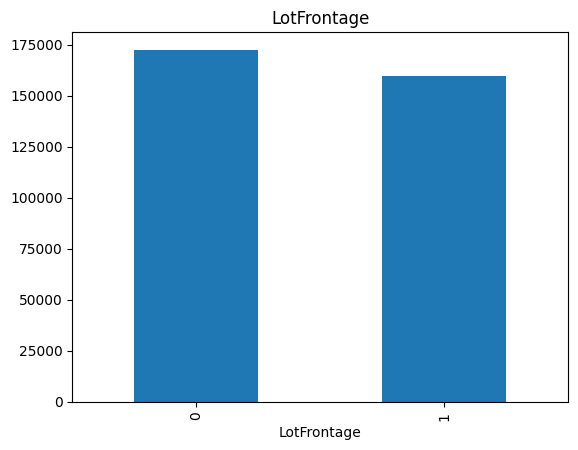

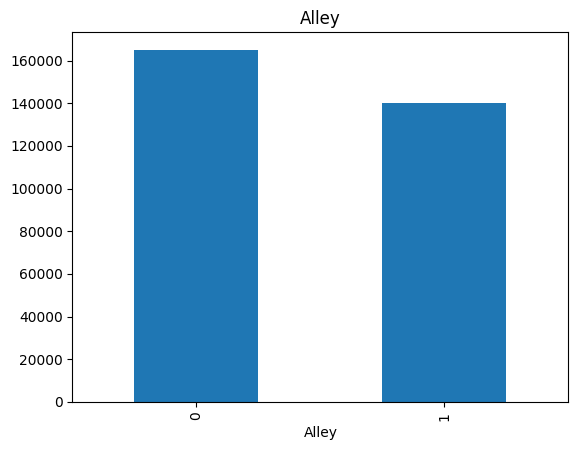

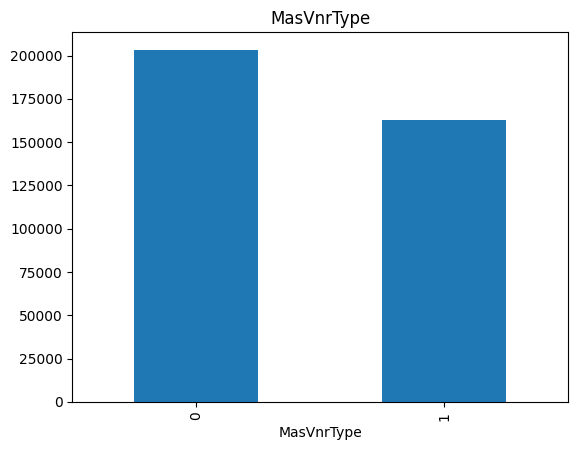

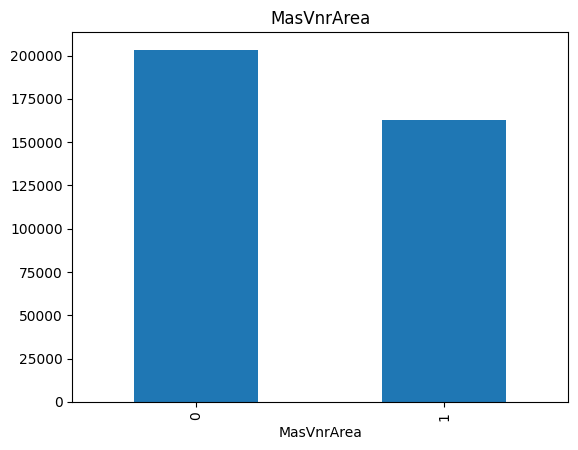

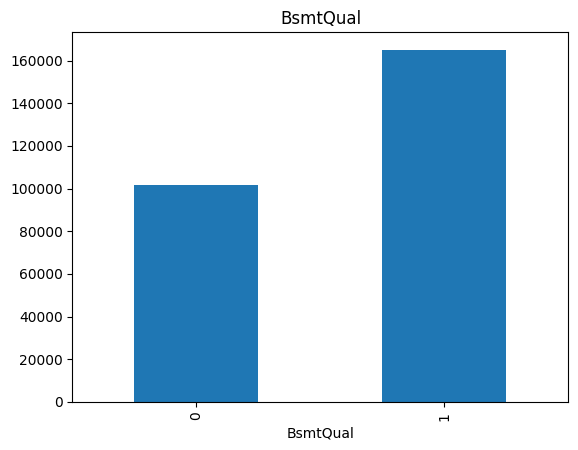

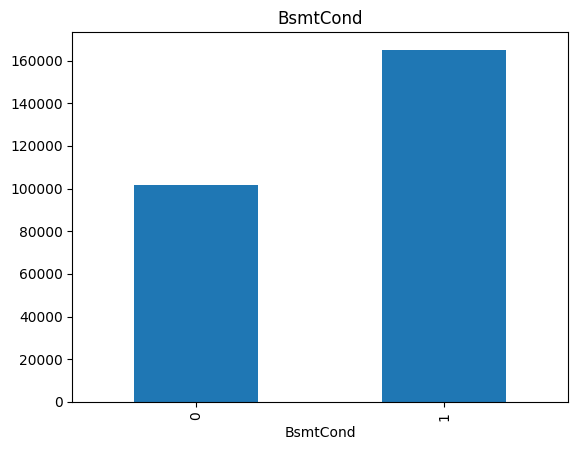

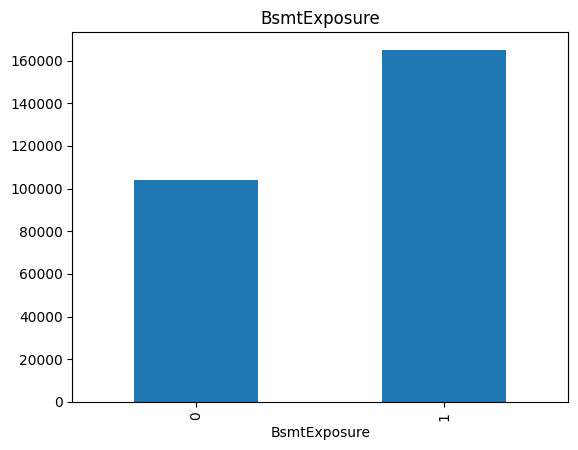

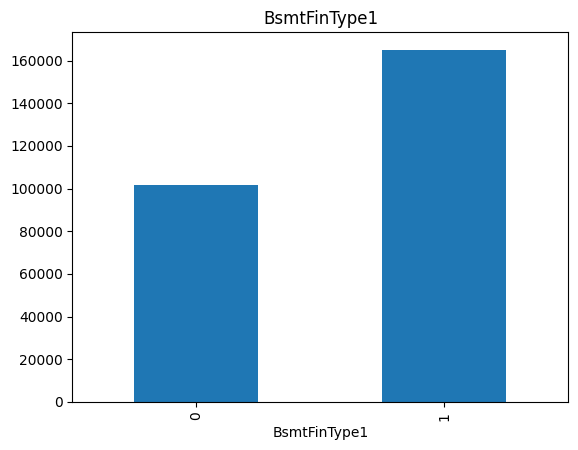

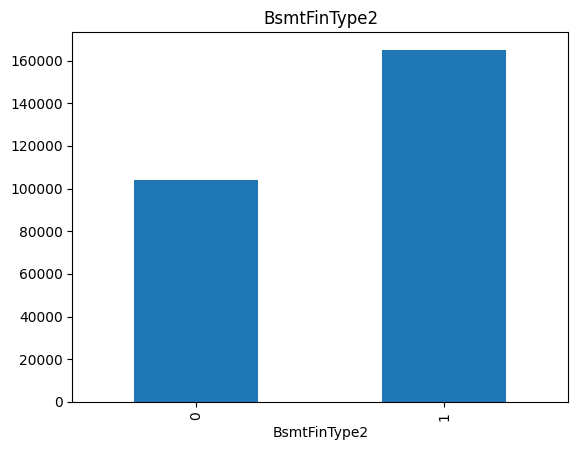

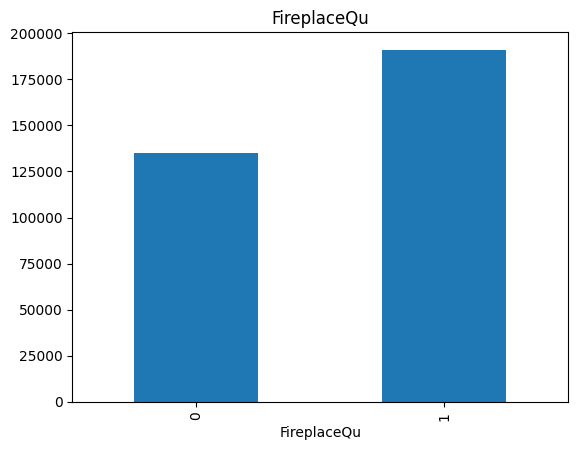

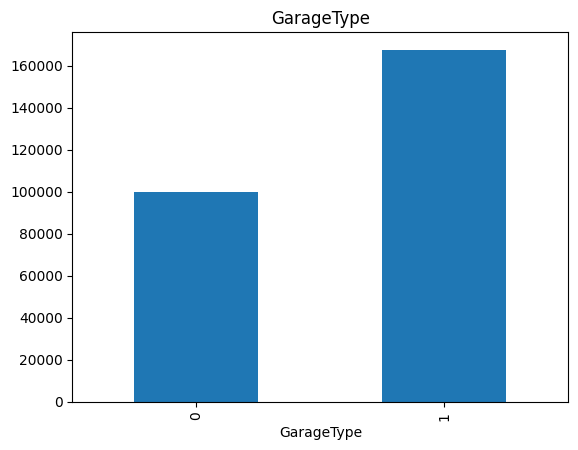

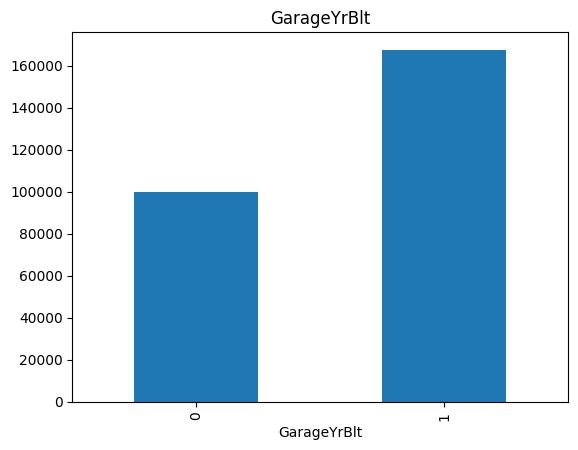

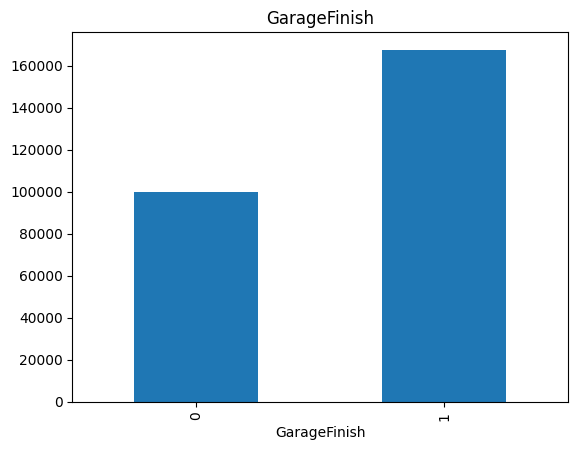

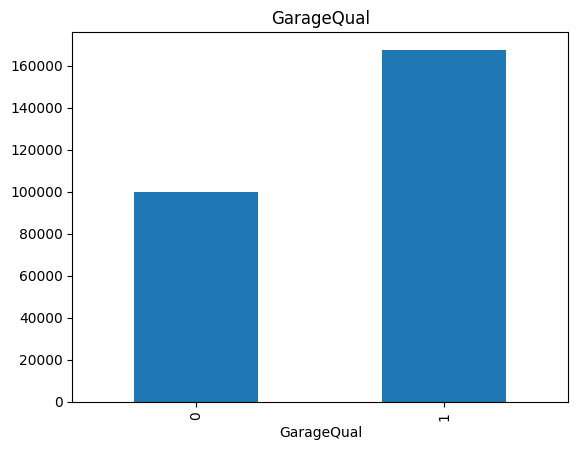

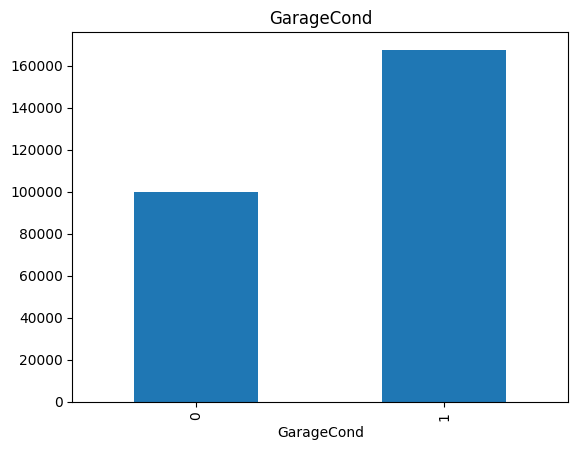

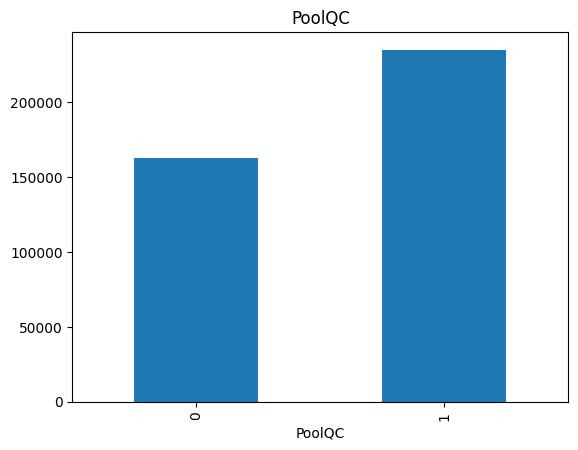

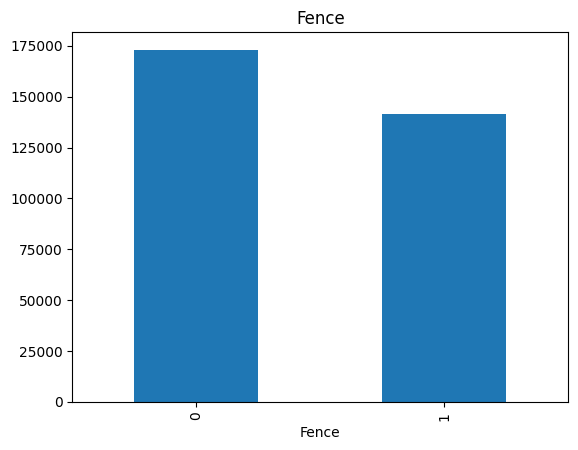

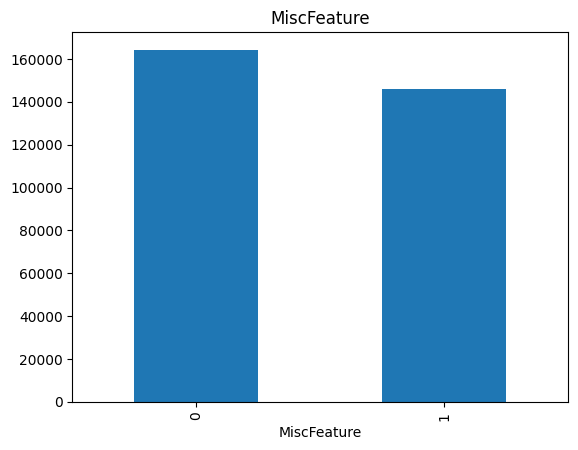

In [97]:
for feature in features_with_na:
  # shallow copy
  d=data.copy()
  d[feature]=np.where(d[feature].isnull(),0,1)

  d.groupby(feature)['SalePrice'].median().plot.bar()
  plt.title(feature)
  plt.show()

## So with this we can understand that this nan values are mostly contributing for higher sales hence we cannot remove it and hence we need to replace it with some value

# **Checking the Numerical variables**

In [98]:
features_with_num=[feature for feature in data.columns if data[feature].dtypes!='O']

In [99]:
features_with_num

['Id',
 'MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

In [100]:
len(features_with_num)

38

In [101]:
data[features_with_num].head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


# It can be seen that even dates are included , so we will extract the columsns with date time

In [102]:
features_with_date=[feature for feature in data.columns if 'Year' in feature or 'Yr' in feature]

In [103]:
features_with_date

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [104]:
for feature in features_with_date:

  print(feature ,data[feature].unique())

YearBuilt [2003 1976 2001 1915 2000 1993 2004 1973 1931 1939 1965 2005 1962 2006
 1960 1929 1970 1967 1958 1930 2002 1968 2007 1951 1957 1927 1920 1966
 1959 1994 1954 1953 1955 1983 1975 1997 1934 1963 1981 1964 1999 1972
 1921 1945 1982 1998 1956 1948 1910 1995 1991 2009 1950 1961 1977 1985
 1979 1885 1919 1990 1969 1935 1988 1971 1952 1936 1923 1924 1984 1926
 1940 1941 1987 1986 2008 1908 1892 1916 1932 1918 1912 1947 1925 1900
 1980 1989 1992 1949 1880 1928 1978 1922 1996 2010 1946 1913 1937 1942
 1938 1974 1893 1914 1906 1890 1898 1904 1882 1875 1911 1917 1872 1905]
YearRemodAdd [2003 1976 2002 1970 2000 1995 2005 1973 1950 1965 2006 1962 2007 1960
 2001 1967 2004 2008 1997 1959 1990 1955 1983 1980 1966 1963 1987 1964
 1972 1996 1998 1989 1953 1956 1968 1981 1992 2009 1982 1961 1993 1999
 1985 1979 1977 1969 1958 1991 1971 1952 1975 2010 1984 1986 1994 1988
 1954 1957 1951 1978 1974]
GarageYrBlt [2003. 1976. 2001. 1998. 2000. 1993. 2004. 1973. 1931. 1939. 1965. 2005.
 1962. 2006.

<Axes: xlabel='YrSold'>

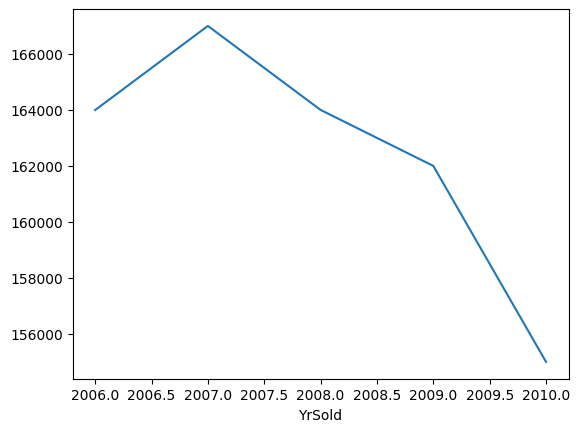

In [105]:
d1=data.copy()

d1.groupby('YrSold')['SalePrice'].median().plot()

In [106]:
data['year_diff']=data['YrSold']-data['YearBuilt']

In [107]:
data['year_diff']

0        5
1       31
2        7
3       91
4        8
        ..
1455     8
1456    32
1457    69
1458    60
1459    43
Name: year_diff, Length: 1460, dtype: int64

# How much was the sales price based on the number of years the house is old


<Axes: xlabel='year_diff'>

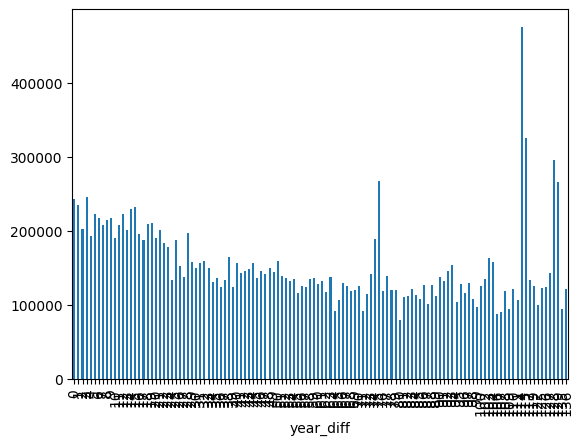

In [108]:
data.groupby('year_diff')['SalePrice'].median().plot.bar()

# **Finding the discrete values**

In [109]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,year_diff
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2008,WD,Normal,208500,5
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,5,2007,WD,Normal,181500,31
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,9,2008,WD,Normal,223500,7
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000,91
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,12,2008,WD,Normal,250000,8


In [110]:
len(data['MSSubClass'].unique())

15

In [111]:
feature_with_discrete=[feature for feature in features_with_num if len(data[feature].unique()) < 25 and feature not in features_with_date ]

In [112]:
feature_with_discrete

['MSSubClass',
 'OverallQual',
 'OverallCond',
 'LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 '3SsnPorch',
 'PoolArea',
 'MiscVal',
 'MoSold']

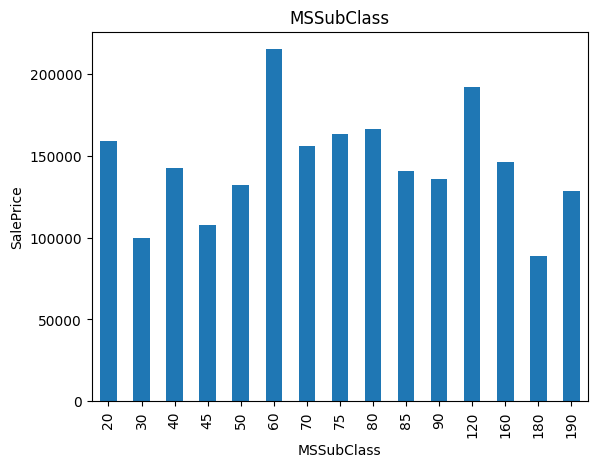

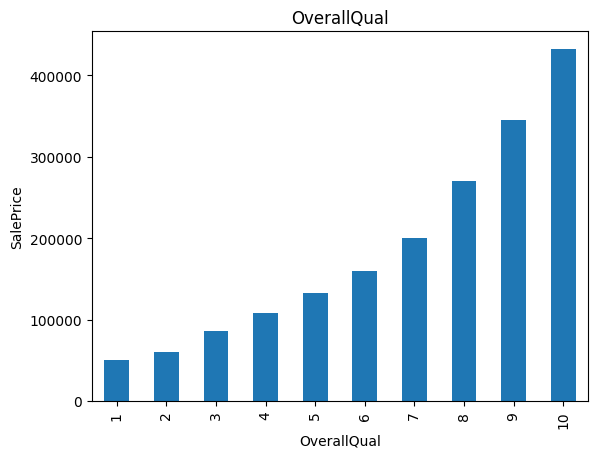

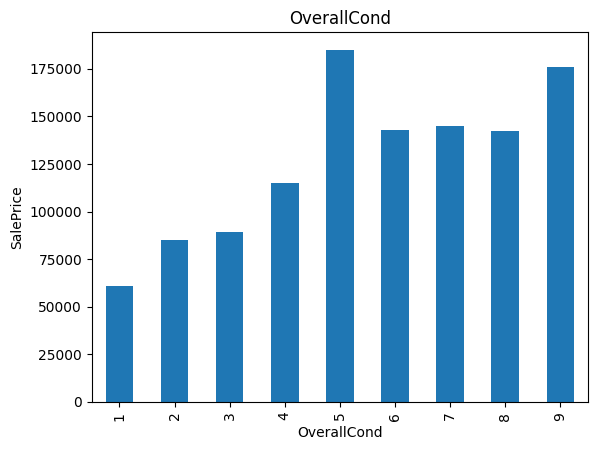

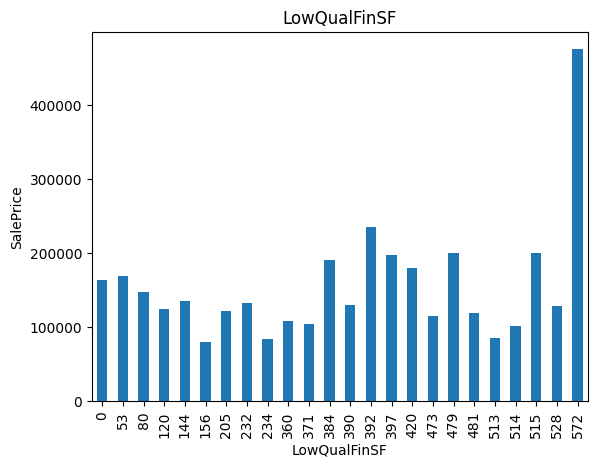

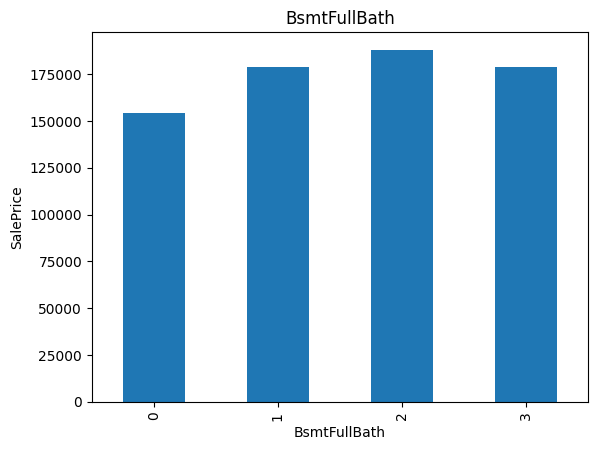

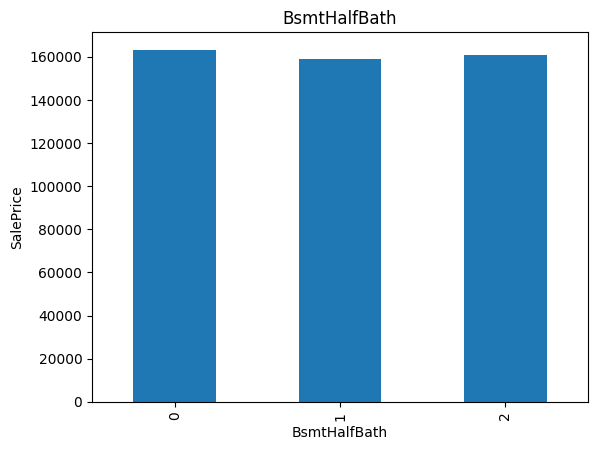

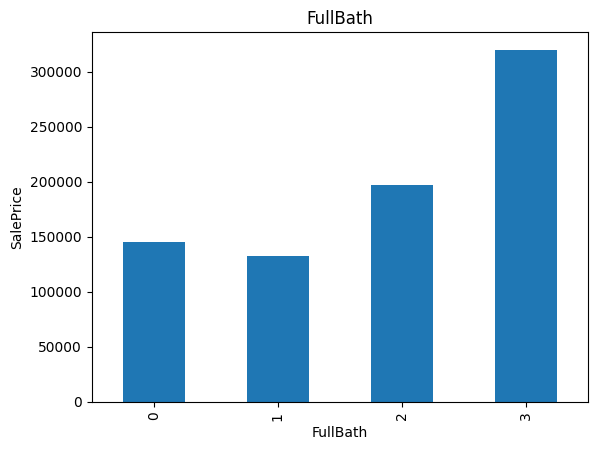

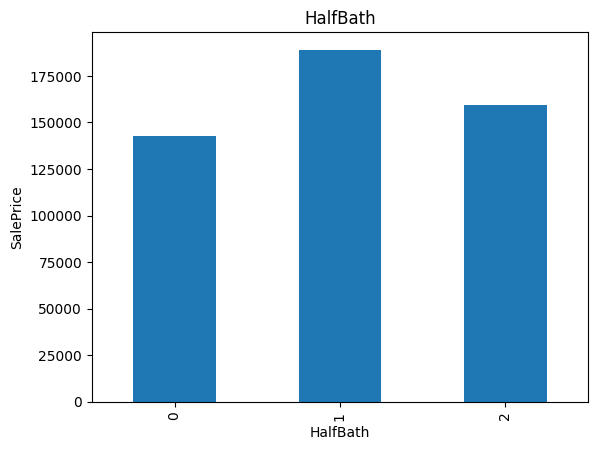

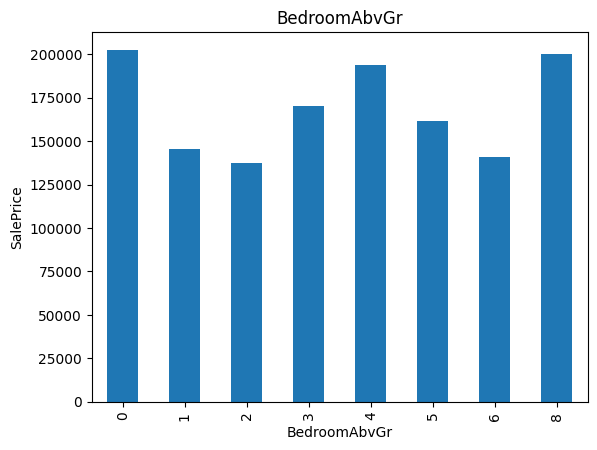

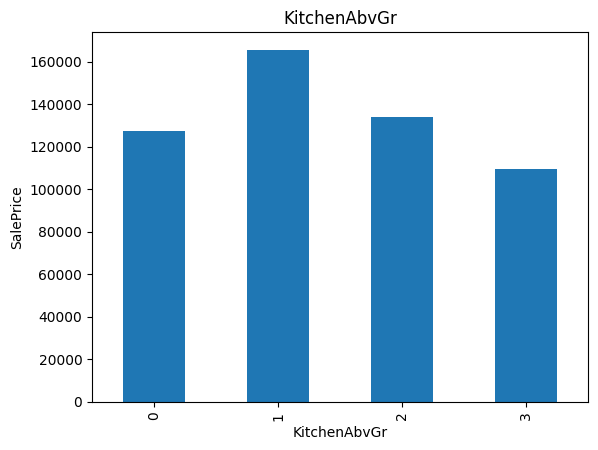

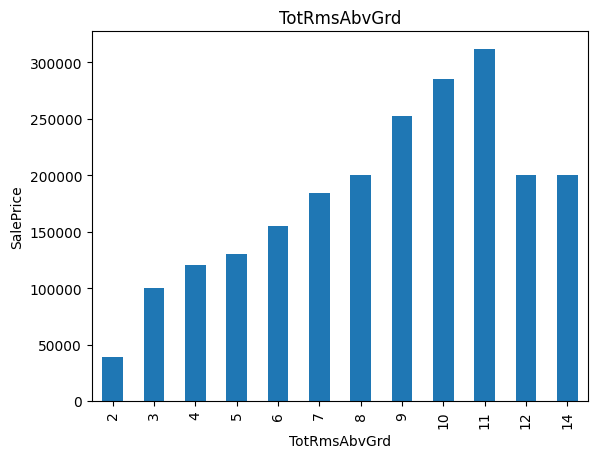

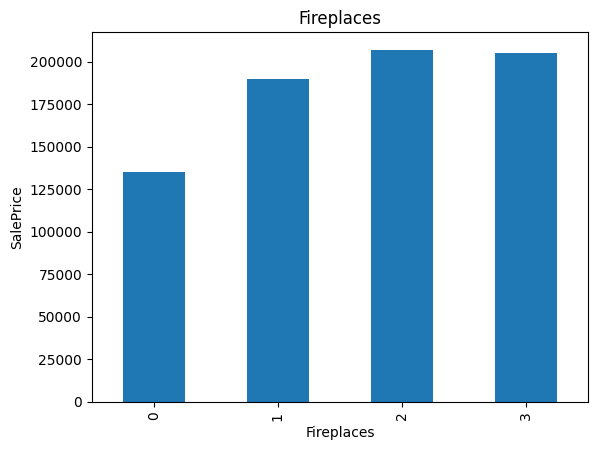

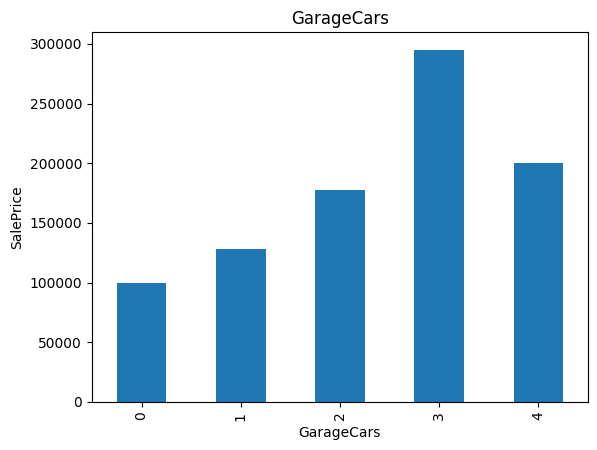

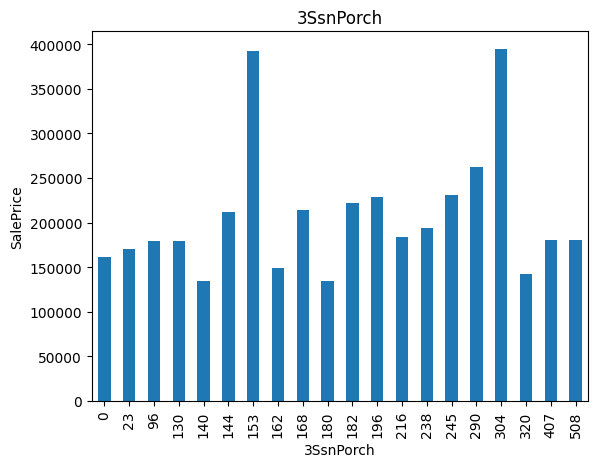

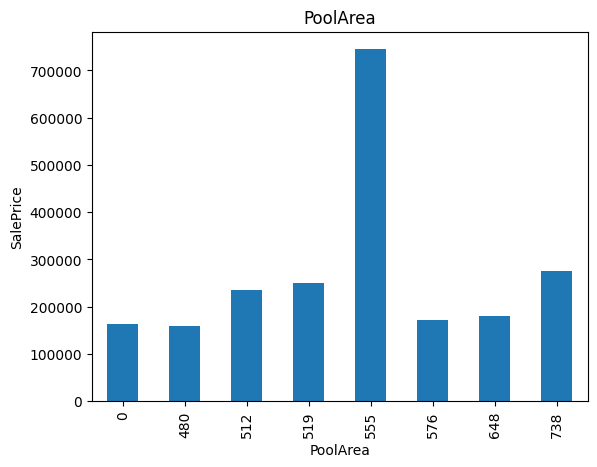

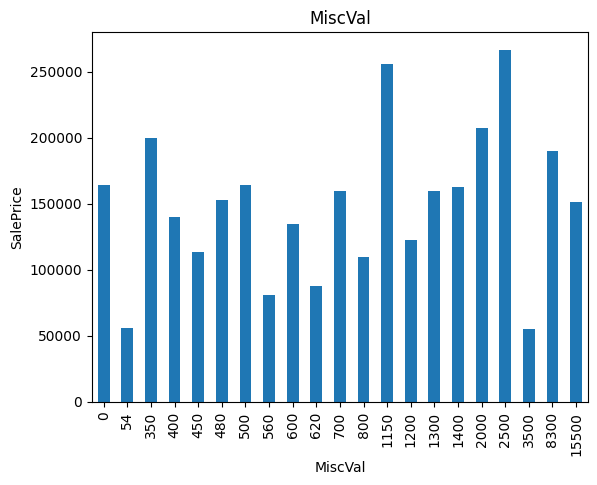

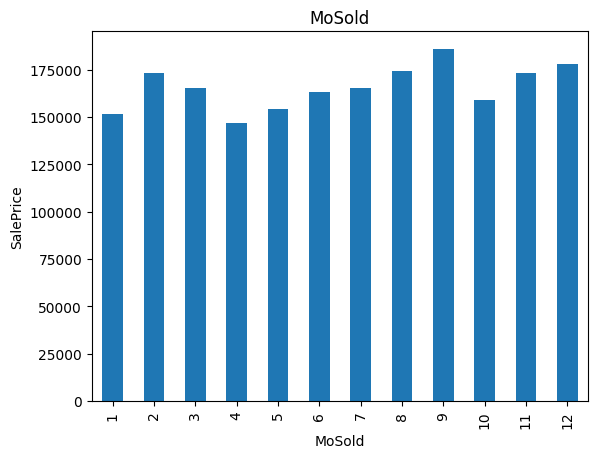

In [113]:
for feature in feature_with_discrete:
  data.groupby(feature)['SalePrice'].median().plot.bar()
  plt.xlabel(feature)
  plt.ylabel('SalePrice')
  plt.title(feature)
  plt.show()

#  Checking the distribution of continous values as if it is gaussian then it is better for linear model to make predictions

In [114]:
continuous_feature=[feature for feature in features_with_num if feature not in feature_with_discrete+features_with_date+['Id']]

In [115]:
continuous_feature

['LotFrontage',
 'LotArea',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 'ScreenPorch',
 'SalePrice']

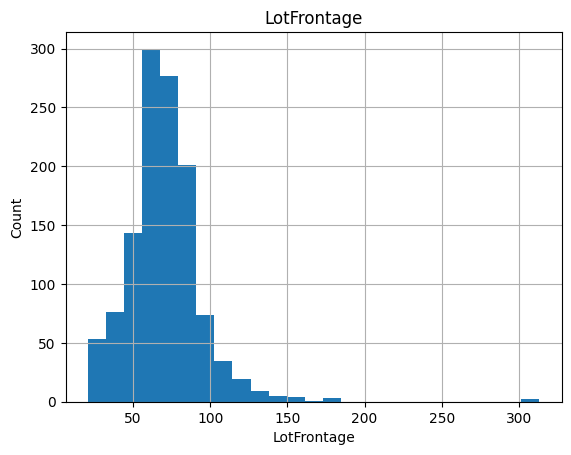

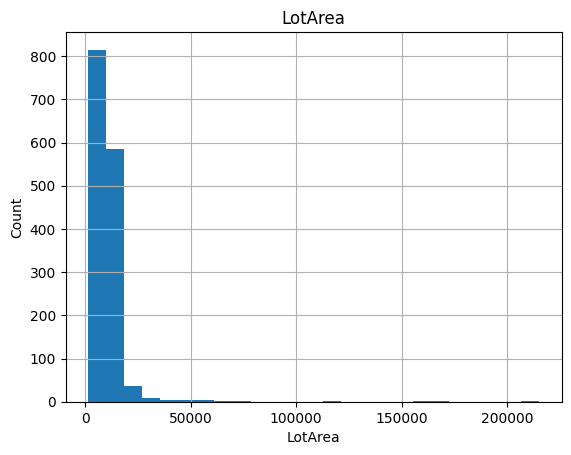

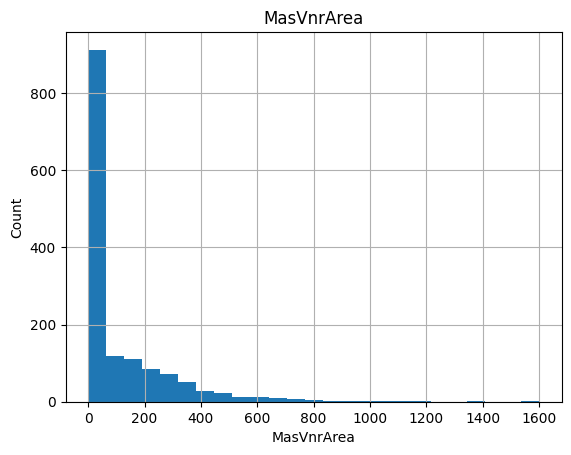

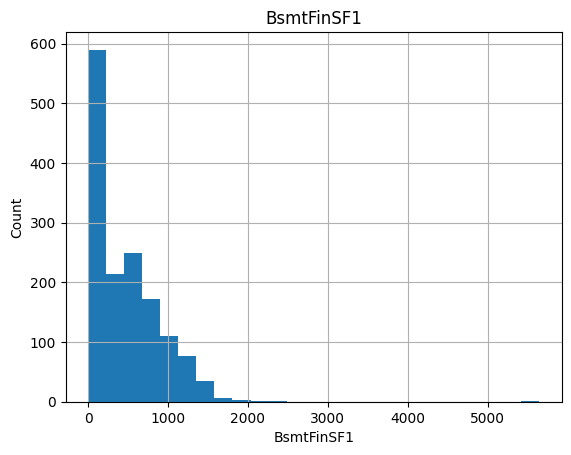

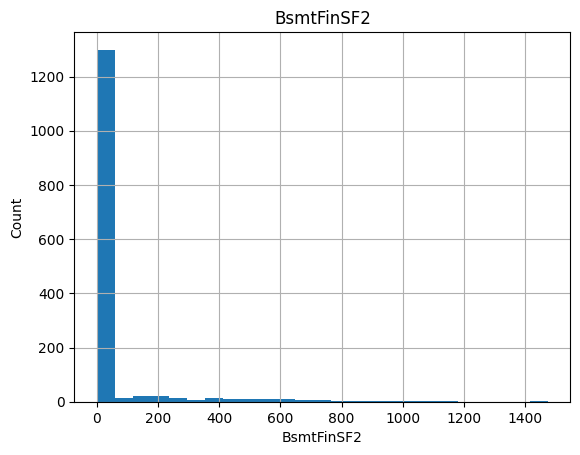

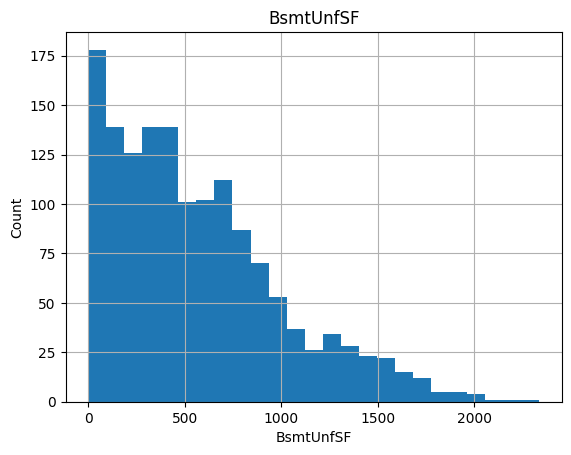

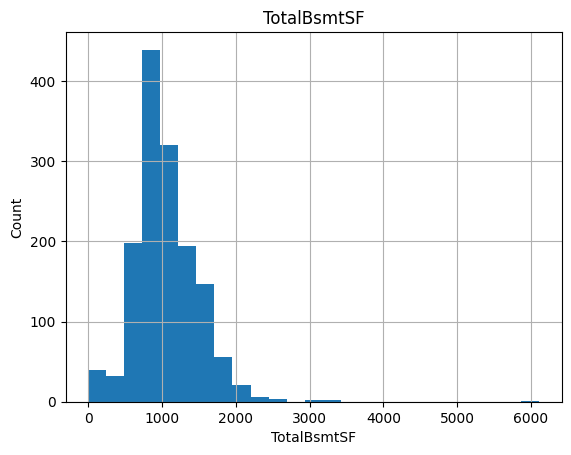

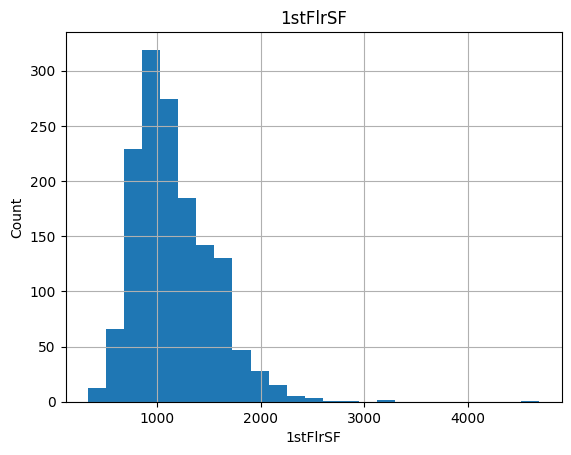

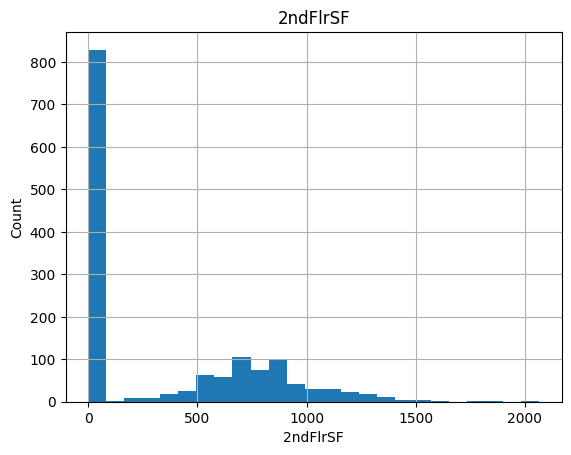

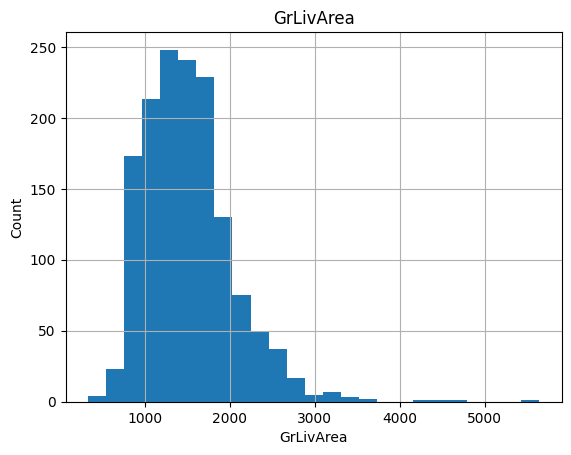

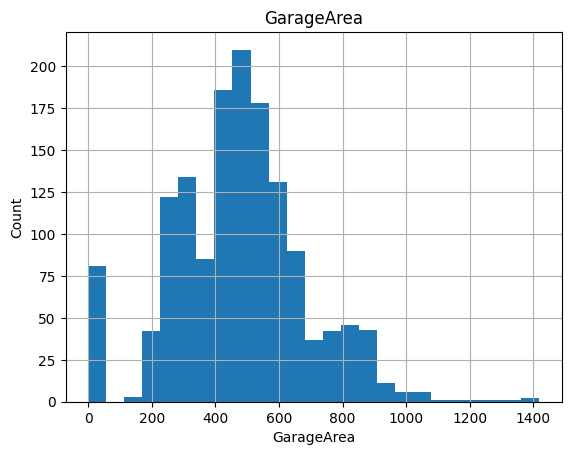

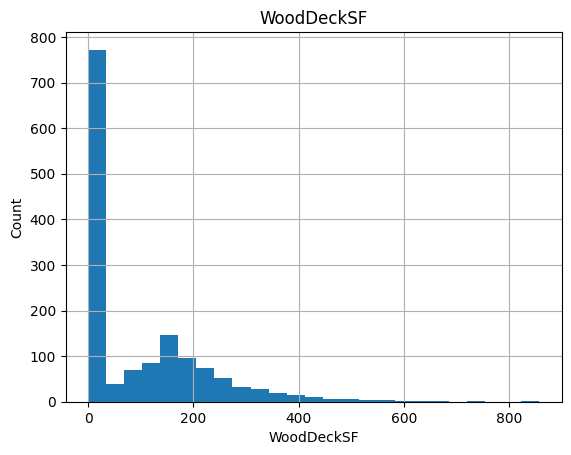

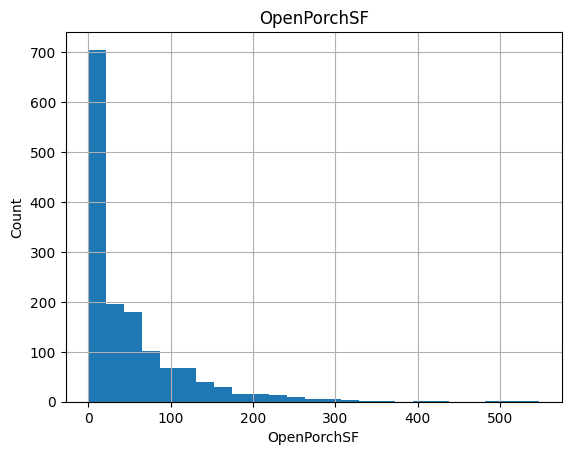

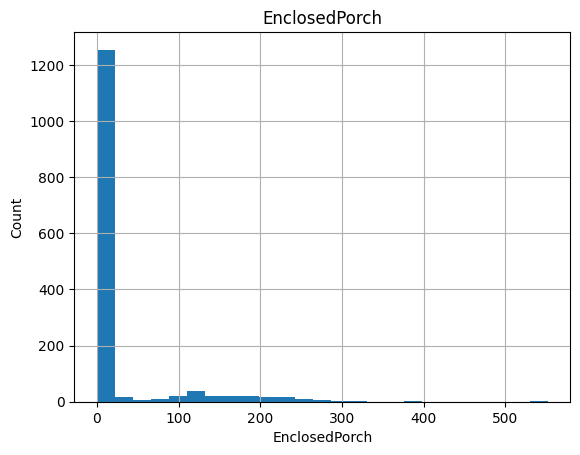

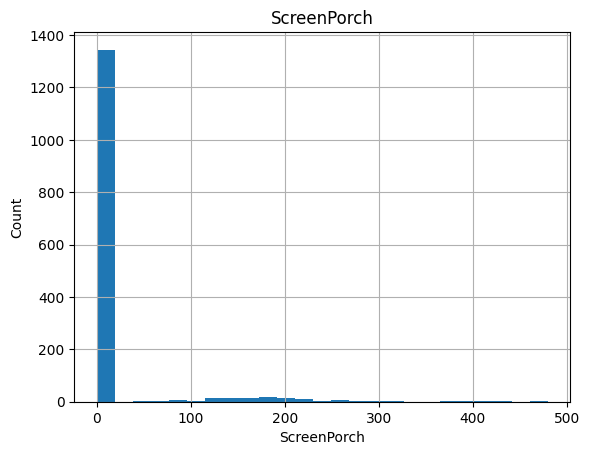

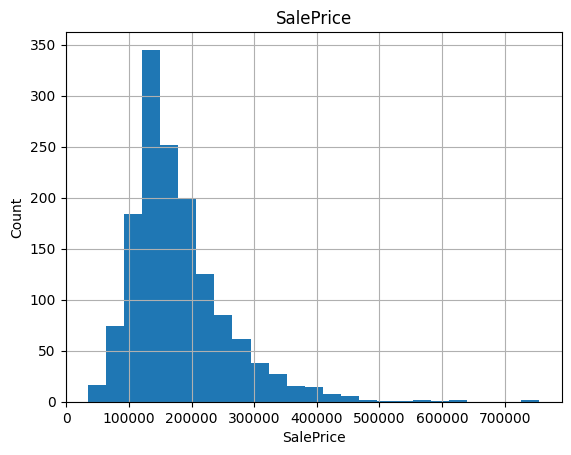

In [116]:
for feature in continuous_feature:
    d2=data.copy()
    d2[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

# **Performing Log normal form (only for continous variables)**

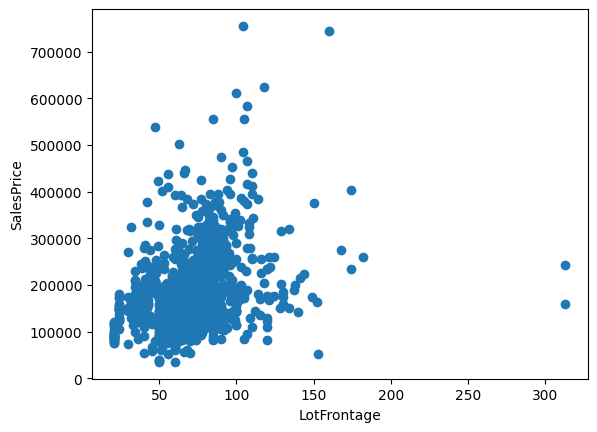

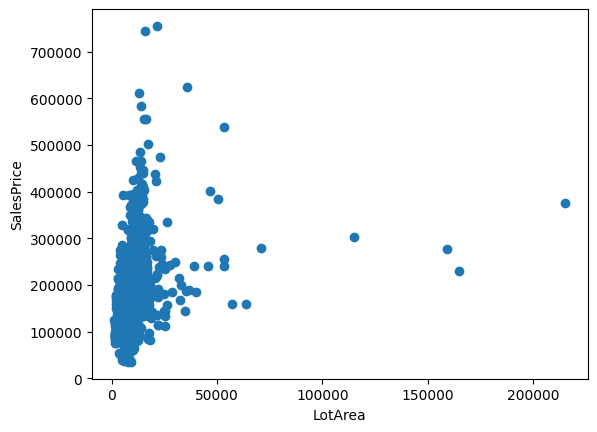

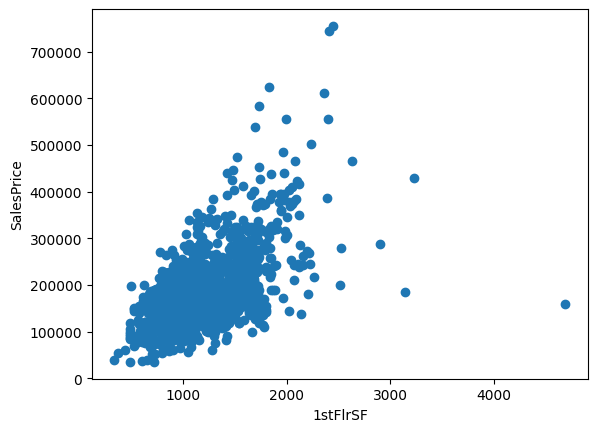

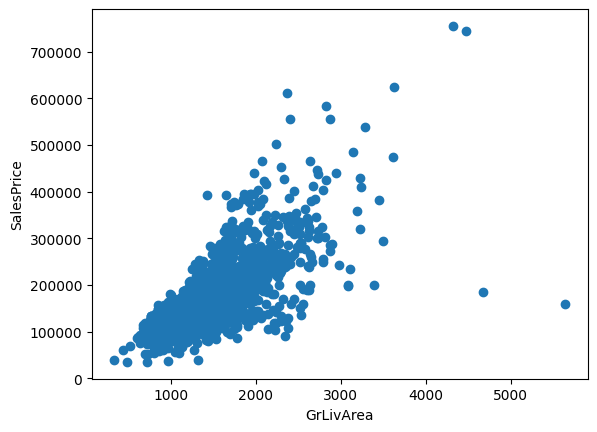

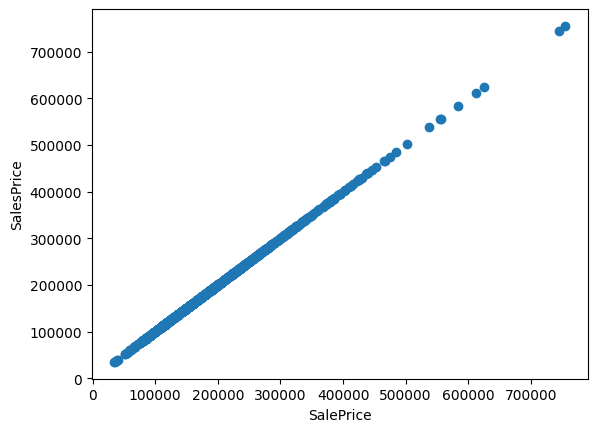

In [120]:
for feature in continuous_feature:
  d1=data.copy()
  if(0 in d1[feature].unique()):
    pass
  else:
    d1[feature]=np.log(d1[feature])
    d1['SalePrice']=np.log(d1['SalePrice'])

    plt.scatter(data[feature],data['SalePrice'])
    plt.xlabel(feature)
    plt.ylabel('SalesPrice')
    plt.show()

# Detecting outliers

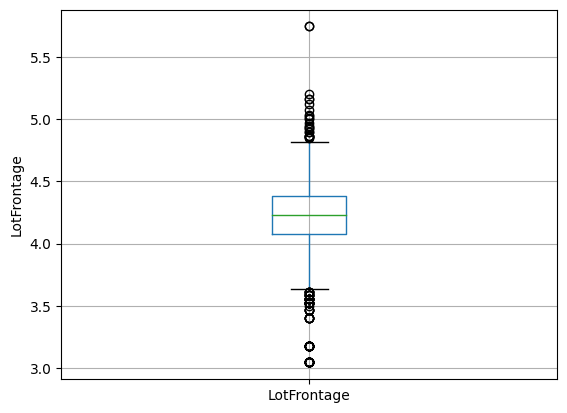

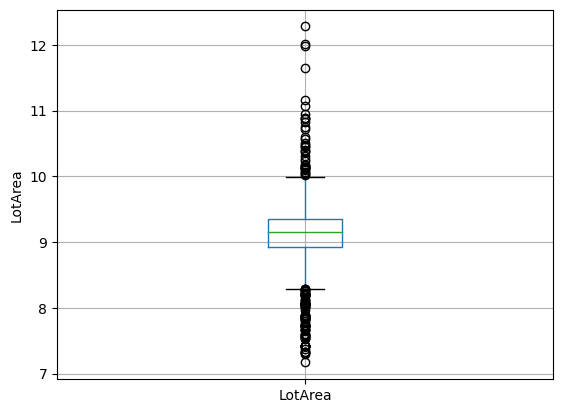

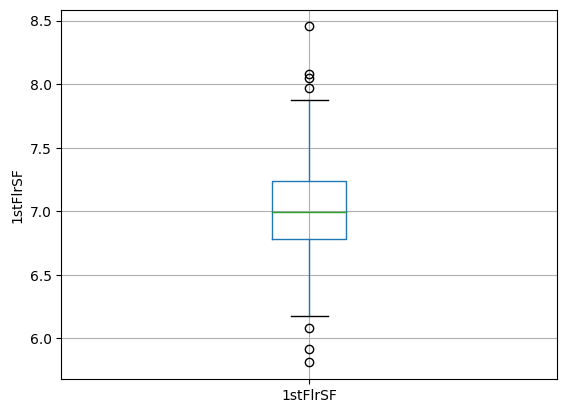

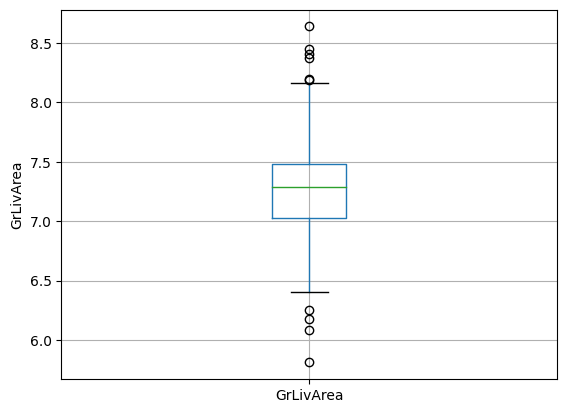

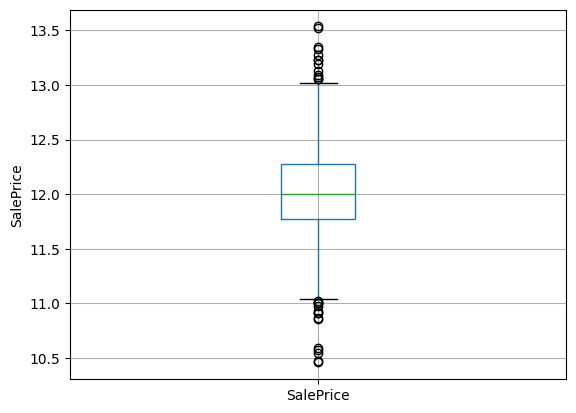

In [123]:

  for feature in continuous_feature:

    d1=data.copy()
    if(0 in d1[feature].unique()):
      pass
    else:

      d1[feature]=np.log(d1[feature])


      d1.boxplot(feature)
      # plt.xlabel(feature)
      plt.ylabel(feature)
      plt.show()

In [124]:
categorical_features=[feature for feature in data.columns if data[feature].dtypes=='O']
categorical_features

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

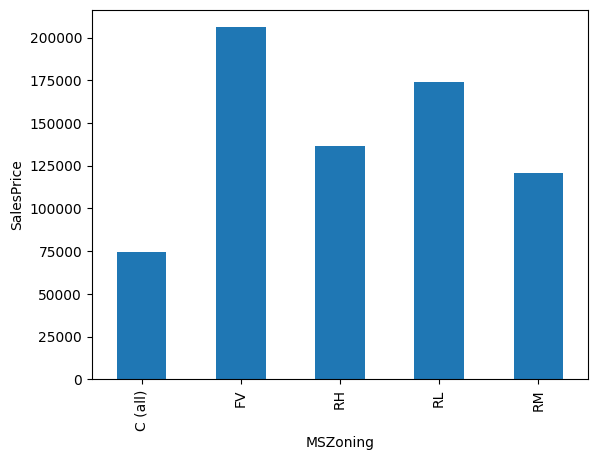

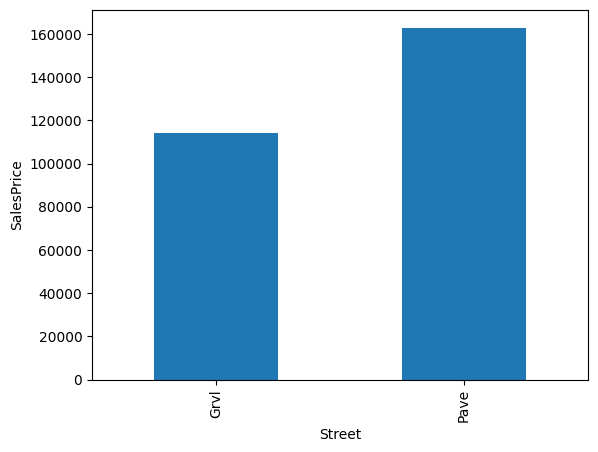

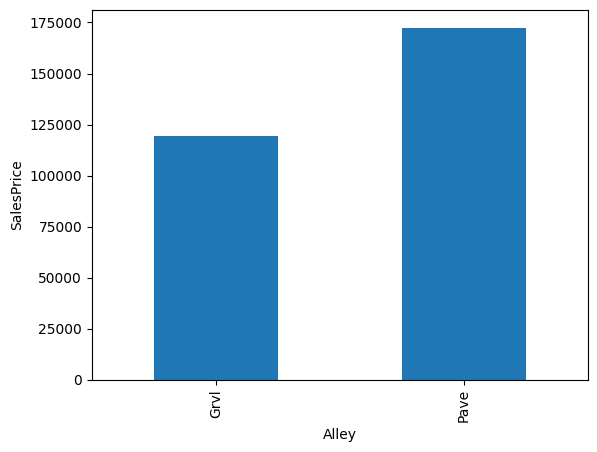

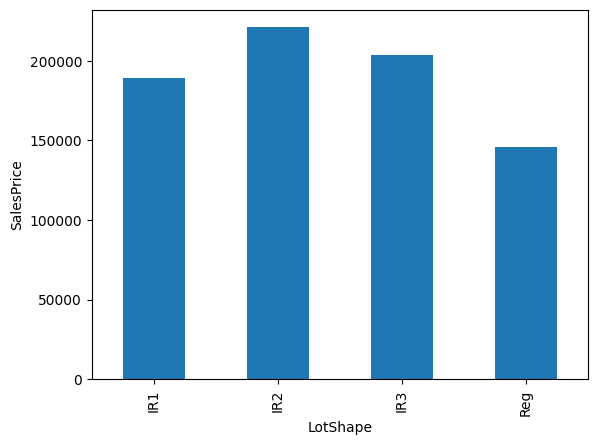

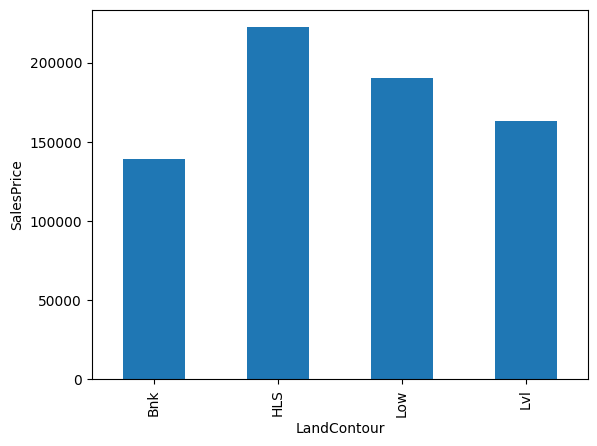

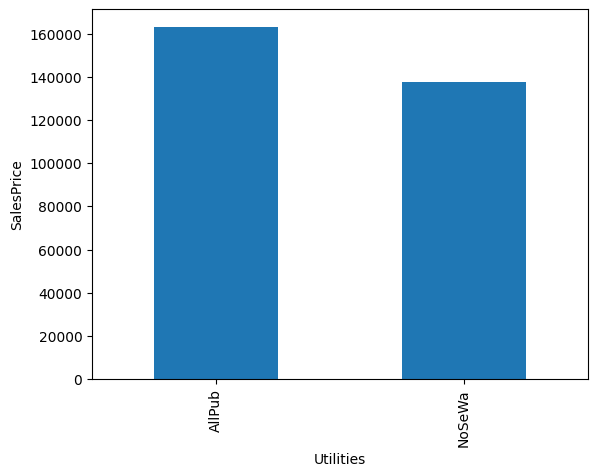

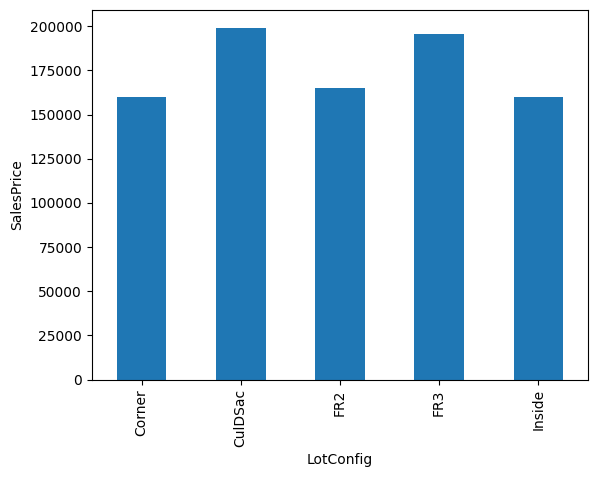

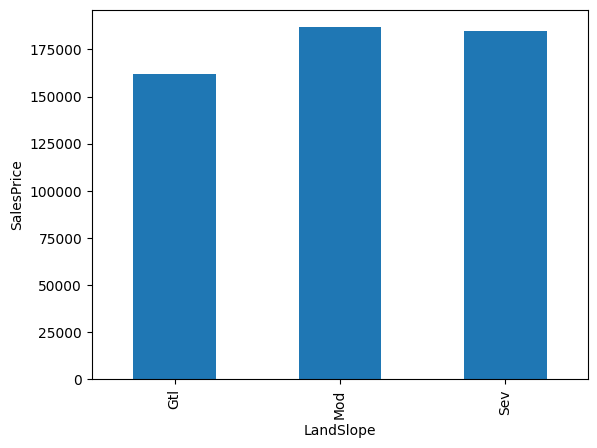

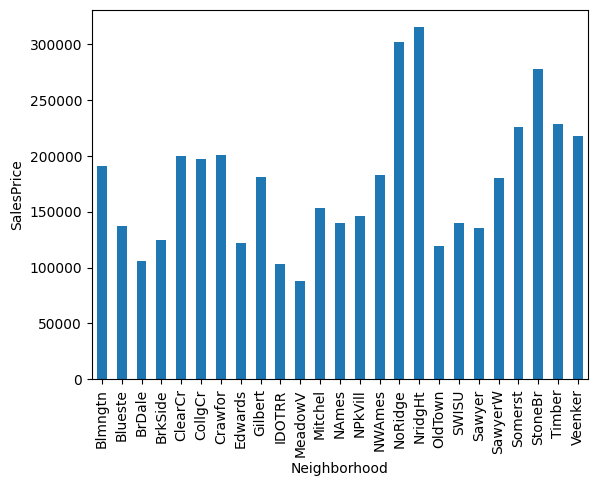

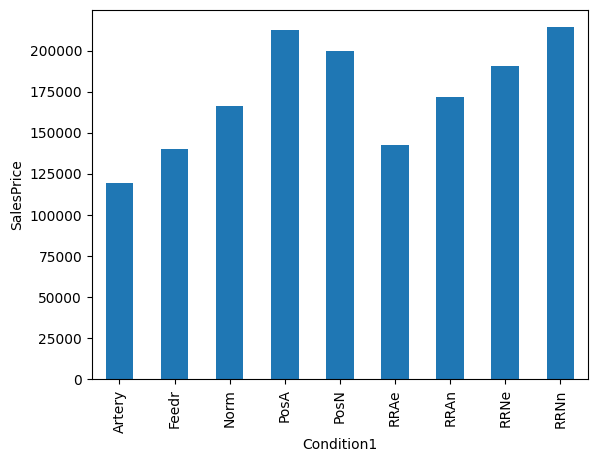

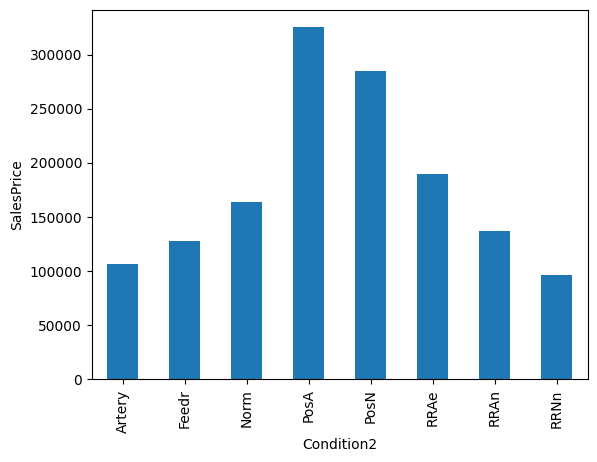

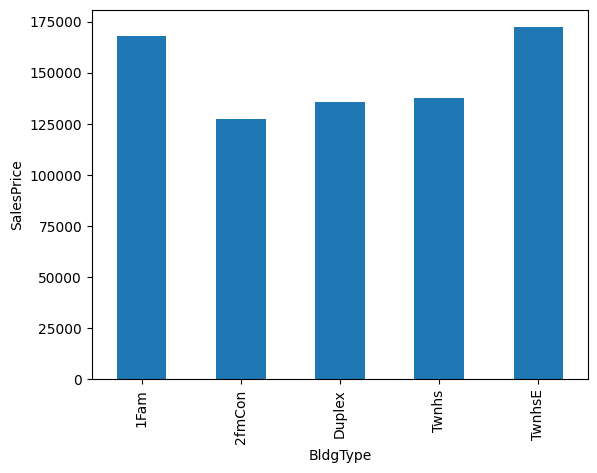

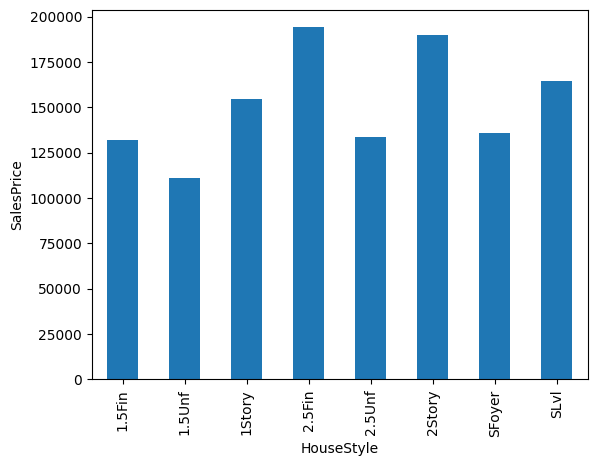

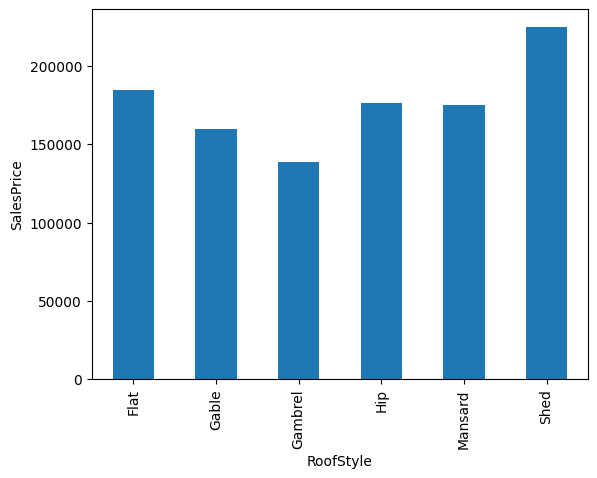

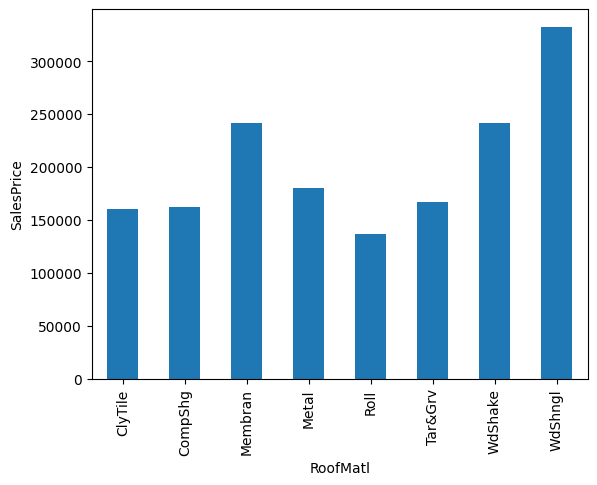

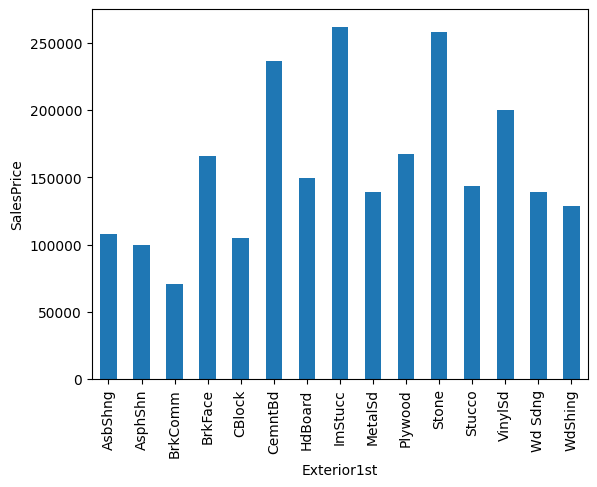

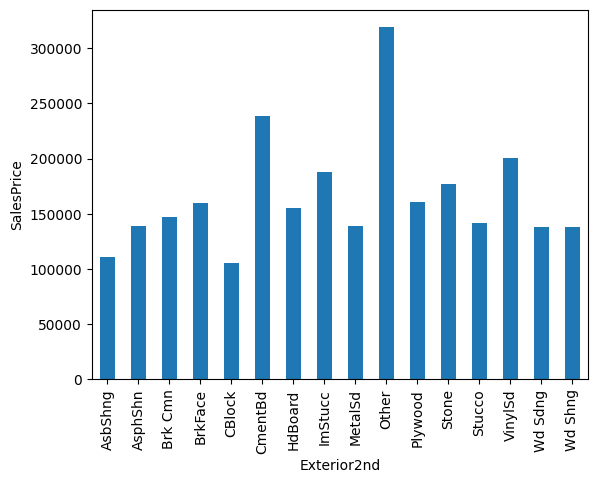

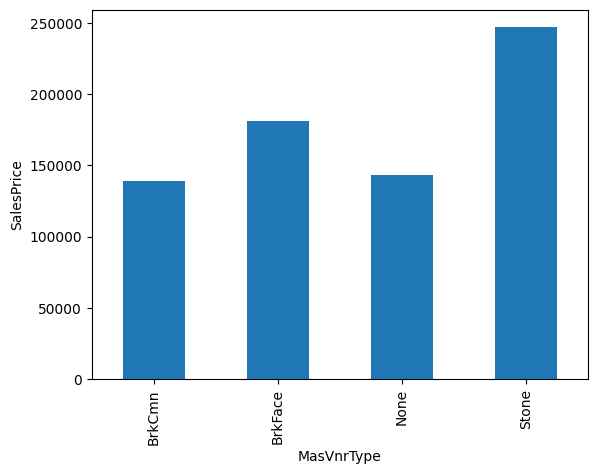

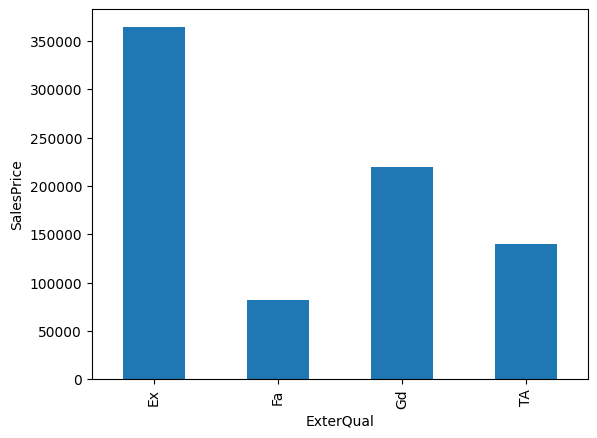

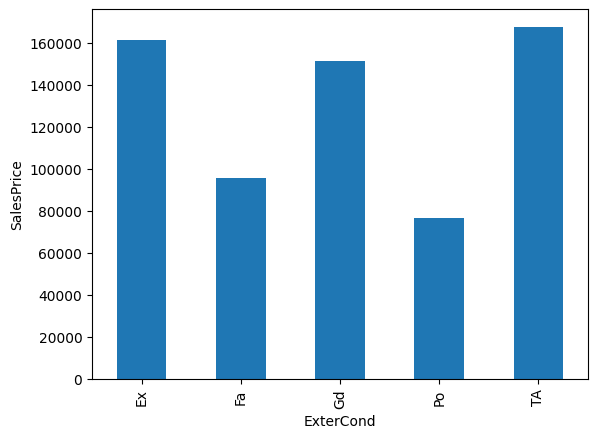

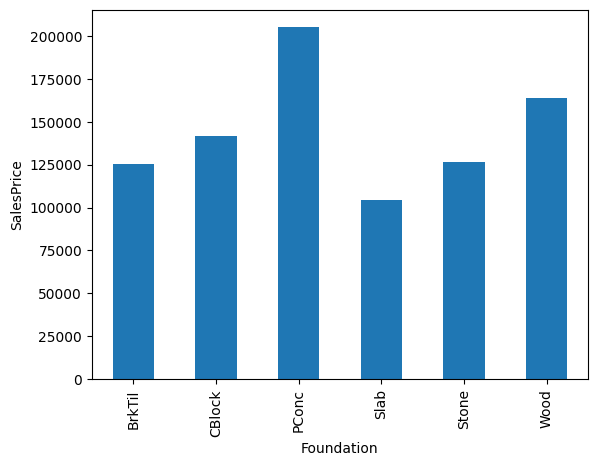

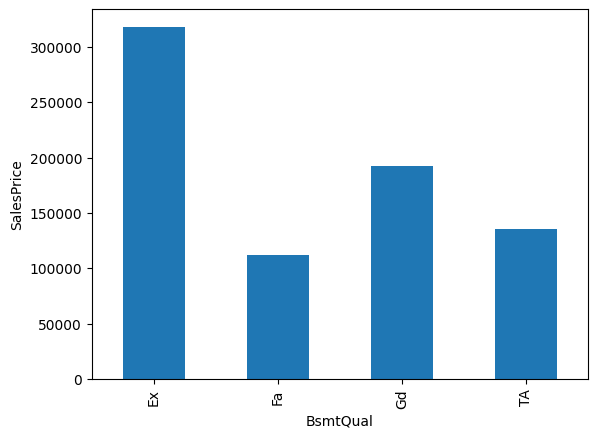

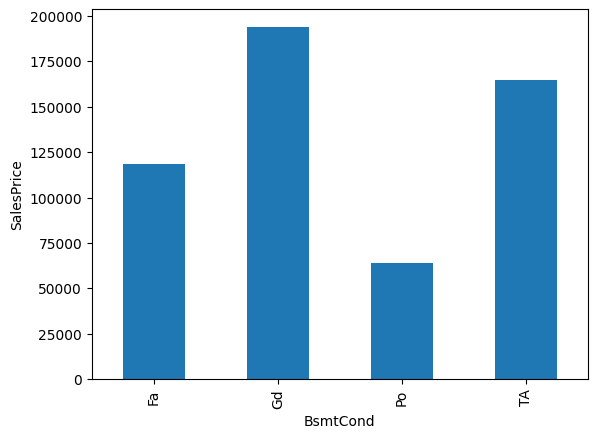

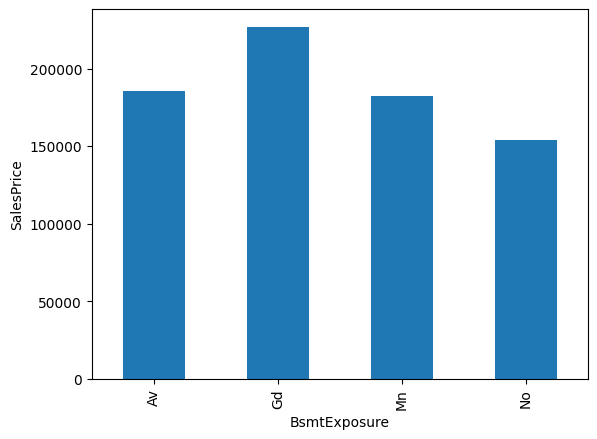

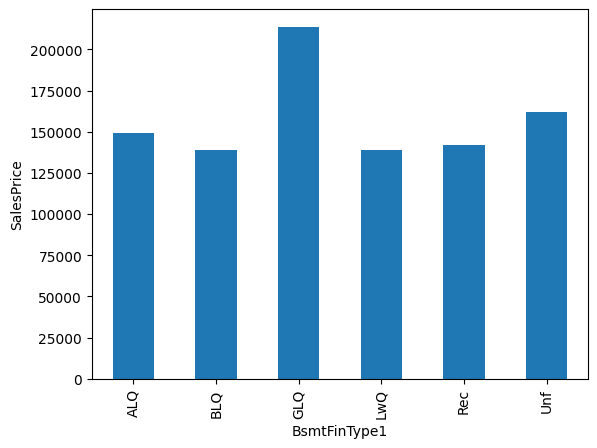

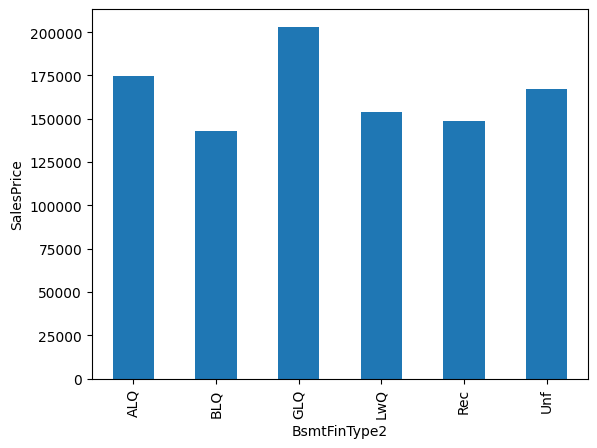

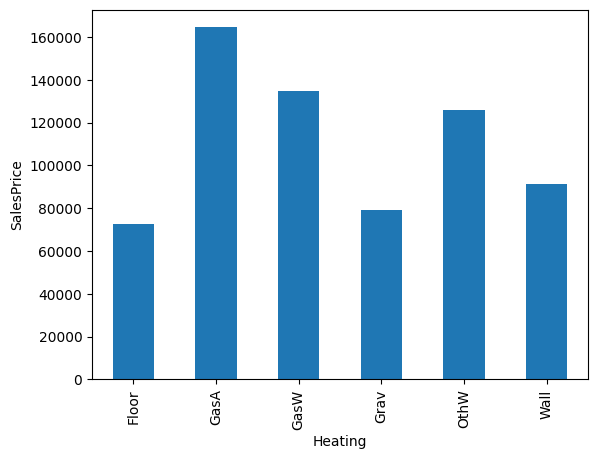

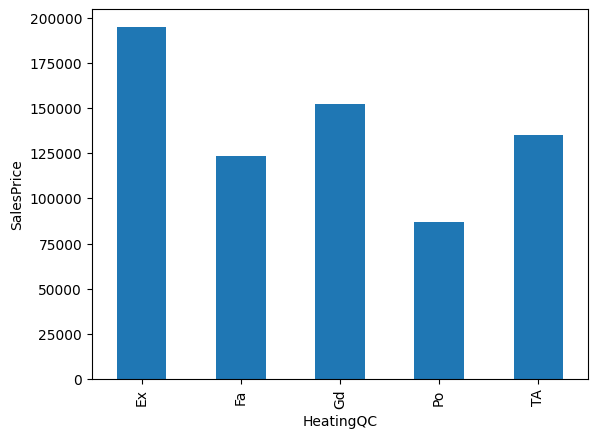

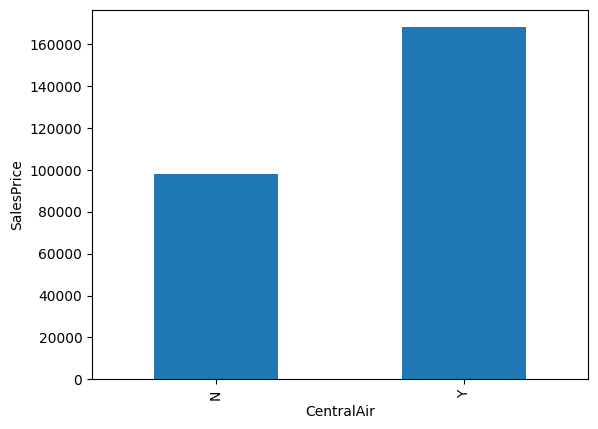

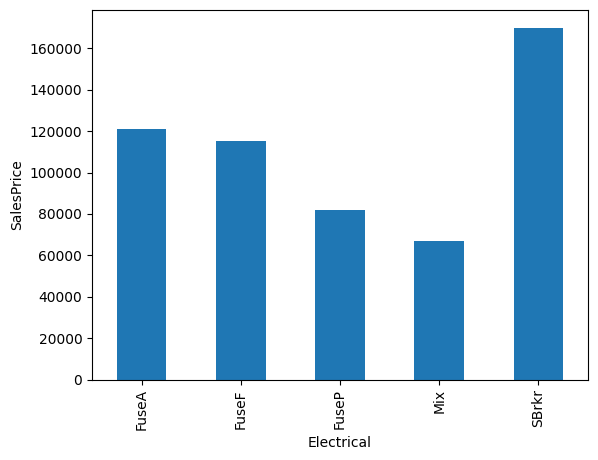

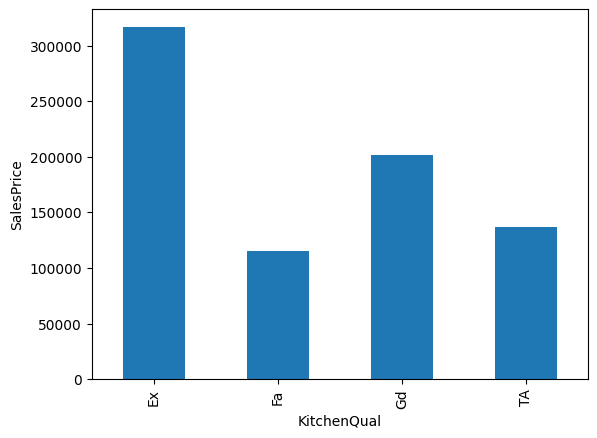

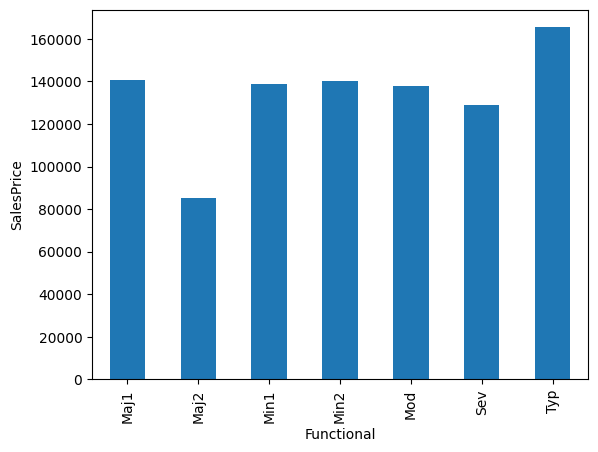

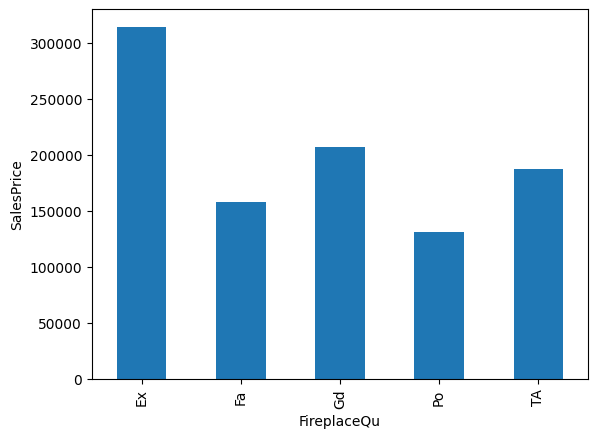

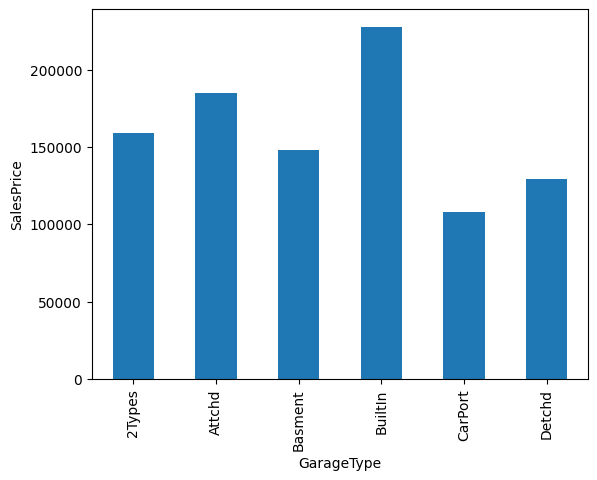

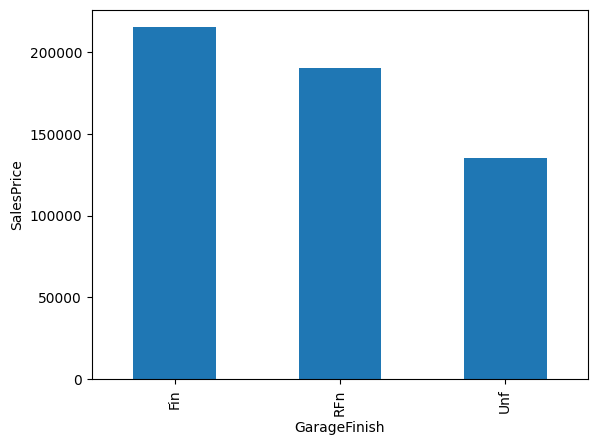

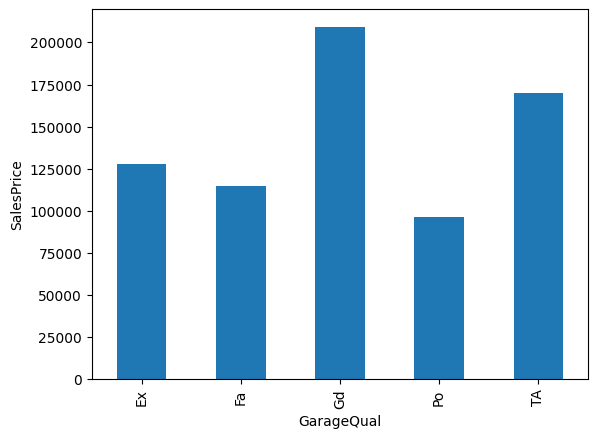

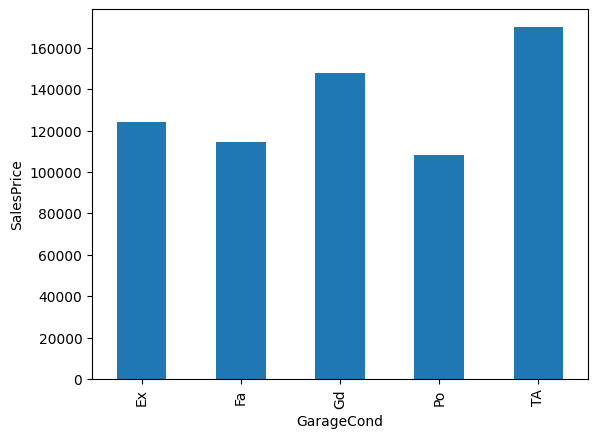

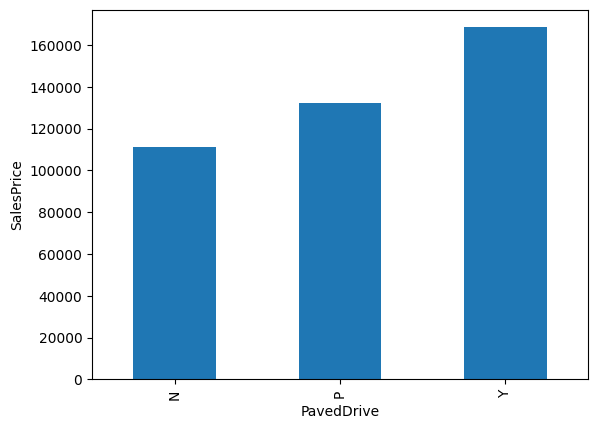

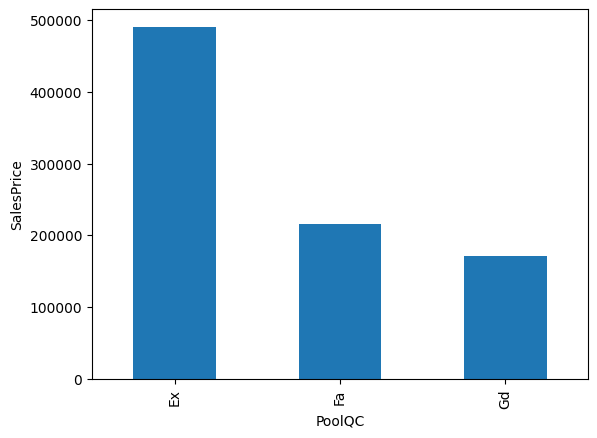

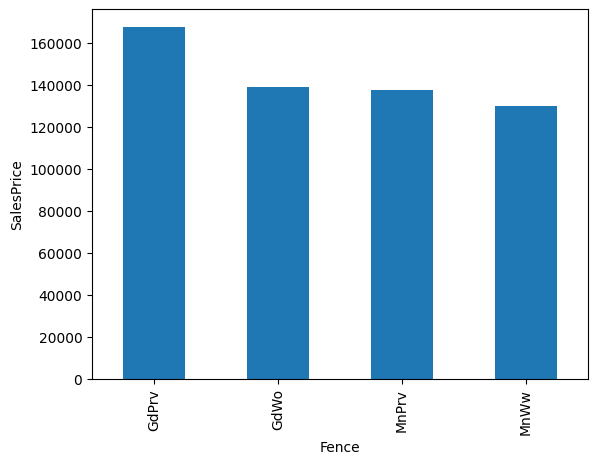

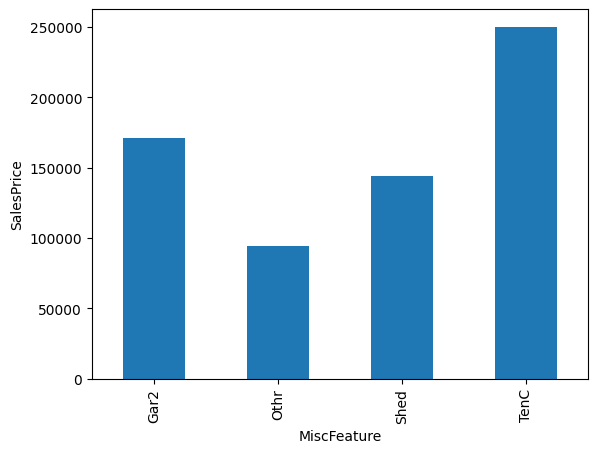

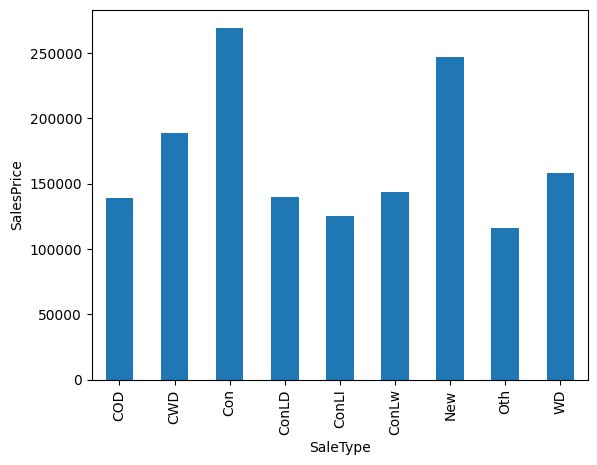

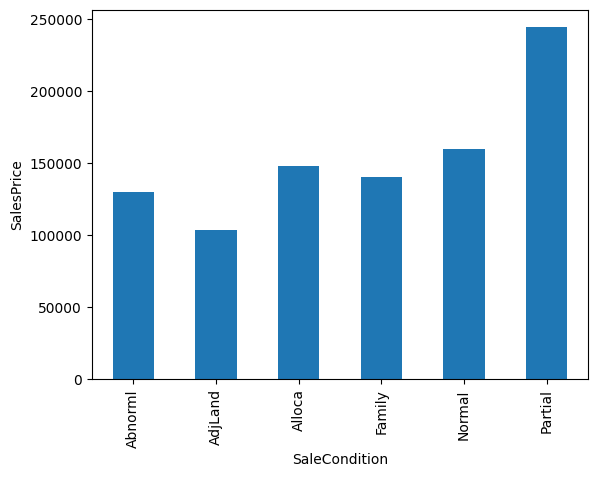

In [127]:
for feature in categorical_features:
  d1=data.copy()
  d1.groupby(feature)['SalePrice'].median().plot.bar()

  plt.xlabel(feature)
  plt.ylabel('SalesPrice')
  plt.show()